In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt 
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.iolib.summary2 import summary_col
import seaborn as sns
import numpy as np
from scipy import stats
%matplotlib inline

In [2]:
df = pd.read_excel('train.xlsx',index_col=0)

In [3]:
df.columns.values

array(['FMCG', 'is_auto', 'is_house', 'is_health', 'is_books',
       'is_beauty', 'is_cloth', 'is_office', 'is_gifts', 'is_sport',
       'is_child', 'is_uni', 'is_tech', 'esales_20', 'delta_esales_20',
       'orders', 'delta_orders', 'av_price', 'delta_av_price', 'traffic',
       'INT_18', 'INT_19', 'INT_20', 'INT_21', 'FA_18', 'FA_19', 'FA_20',
       'FA_21', 'Stocks_18', 'Stocks_19', 'Stocks_20', 'Stocks_21',
       'NA_18', 'NA_19', 'NA_20', 'NA_21', 'Assets_18', 'Assets_19',
       'Assets_20', 'Assets_21', 'AdCap_18', 'AdCap_19', 'AdCap_20',
       'AdCap_21', 'Rev_18', 'Rev_19', 'Rev_20', 'Rev_21', 'CoS_18',
       'CoS_19', 'CoS_20', 'CoS_21', 'Gross_18', 'Gross_19', 'Gross_20',
       'Gross_21', 'ComExp_18', 'ComExp_19', 'ComExp_20', 'ComExp_21',
       'Turn_18', 'Turn_19', 'Turn_20', 'Turn_21', 'Cur_assets_18',
       'Cur_assets_19', 'Cur_assets_20', 'Cur_assets_21', 'Capital_18',
       'Capital_19', 'Capital_20', 'Capital_21', 'long_debt_18',
       'long_debt_19', '

In [29]:
df['ln_delta_stocks'] = np.log(df['Stocks_20']/df['Stocks_18'])
df['ln_com_exp_20'] = np.log(df['com_exp_20'])
df['ln_esales_20'] = np.log(df['esales_20'])
df['ln_LR_COV_20'] = np.log((df['Capital_20']+df['long_debt_20'])/df['Assets_20'])
df['delta_stocks'] = (df['Stocks_20']/df['Stocks_18'])
df['ROA_20'] = (df['EBT_20'] / df['Assets_20'])
df['delta_com_exp'] = (df['com_exp_20']/df['com_exp_18'])
df['esales_20'] = (df['esales_20'])
df['ROE_20'] = (df['EBT_20'] / df['Capital_20'])
df['LR_COV_20'] = ((df['Capital_20']+df['long_debt_20'])/df['Assets_20'])
df['ROE_18'] = (df['EBT_18'] / df['Capital_18'])
df['ROA_18'] = (df['EBT_18'] / df['Assets_18'])
df['LR_COV_18'] = ((df['Capital_18']+df['long_debt_18'])/df['Assets_18'])
df['l_traffic'] = np.log(df['traffic'])
df['aut'] = (df['short_debt_20'] + df['long_debt_20']) / df['Assets_20']

C:\Users\demen\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\demen\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


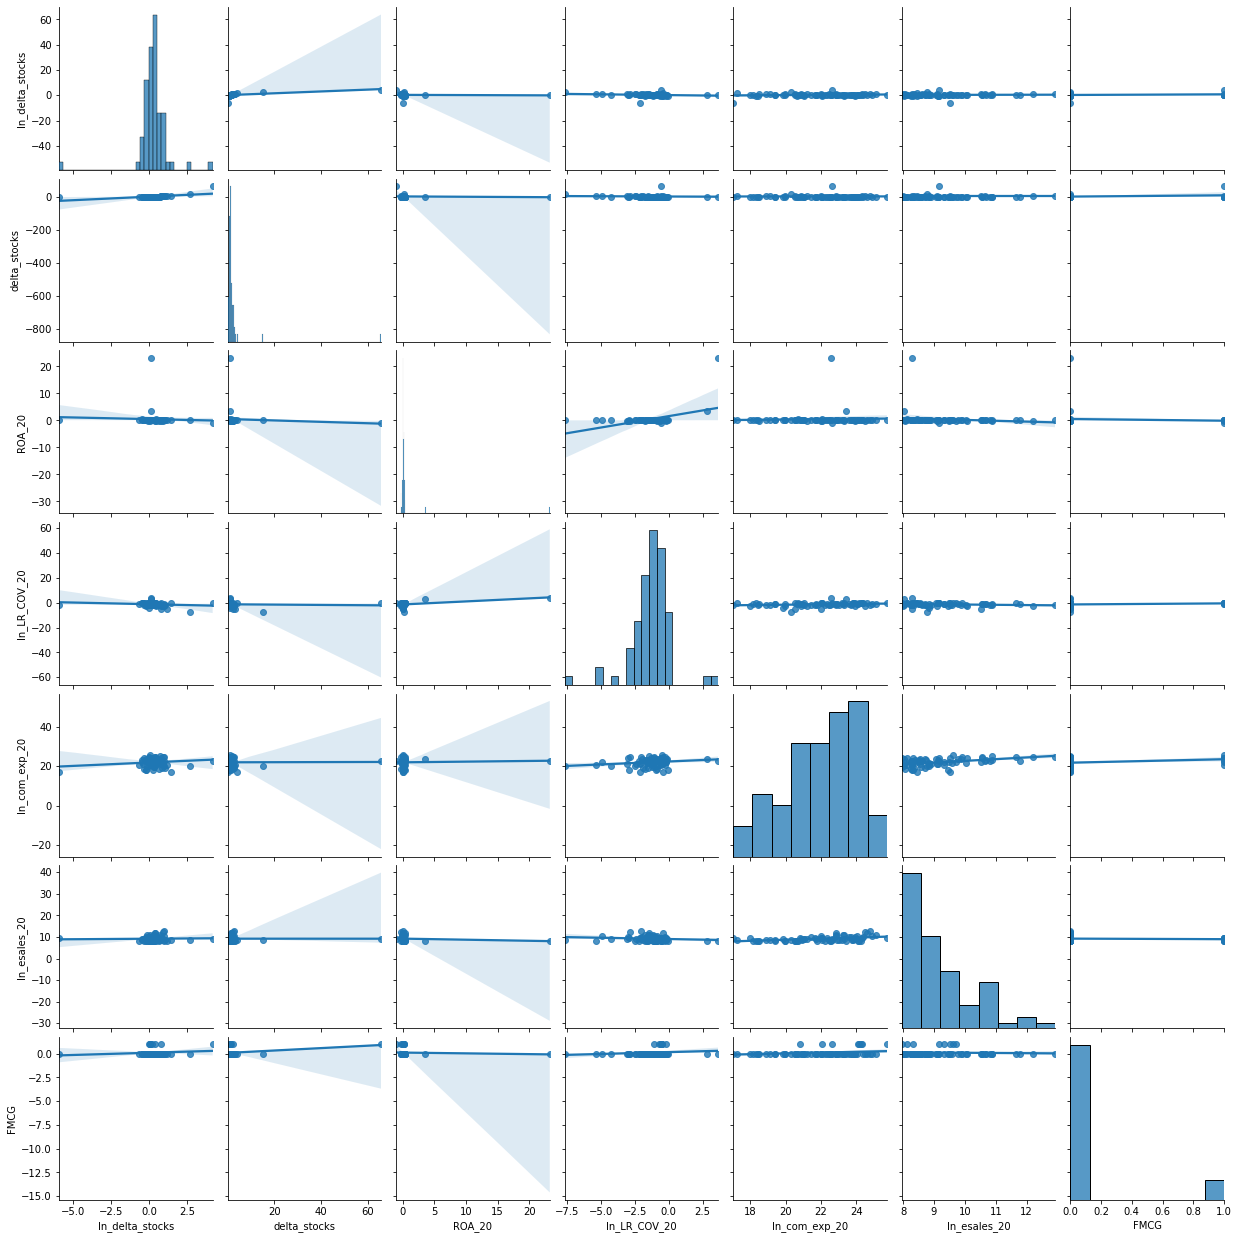

In [47]:
sns.pairplot(df[['ln_delta_stocks','delta_stocks','ROA_20','ln_LR_COV_20','ln_com_exp_20','ln_esales_20','FMCG']]
             [(df['ln_delta_stocks']!=0)&(df['Stocks_18']!=0)&(df['Assets_20']!=0)&(df['com_exp_20']!=0)].dropna(),kind='reg')

In [32]:
df[['ln_delta_stocks','delta_stocks','ROA_20','ln_LR_COV_20','ln_com_exp_20','ln_esales_20']][(df['ln_delta_stocks']!=0)&(df['Stocks_18']!=0)&(df['Assets_20']!=0)&(df['com_exp_20']!=0)&(df['aut']<1)].dropna().describe()

,ln_delta_stocks,delta_stocks,ROA_20,ln_LR_COV_20,ln_com_exp_20,ln_esales_20
count,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000
mean,0.303748,2.648982,0.062938,-1.497619,21.974202,9.239863
std,1.047691,8.088874,0.188893,1.319207,2.090038,1.120740
min,-5.907655,0.002719,-1.073508,-7.675203,17.022152,7.955074
25%,-0.019479,0.980712,0.014384,-1.873461,20.645902,8.363346
50%,0.299286,1.349003,0.057679,-1.251179,22.292574,8.866217
75%,0.553761,1.740264,0.141737,-0.589547,23.744291,9.755836
max,4.184848,65.683491,0.375834,-0.078524,25.729748,12.931687


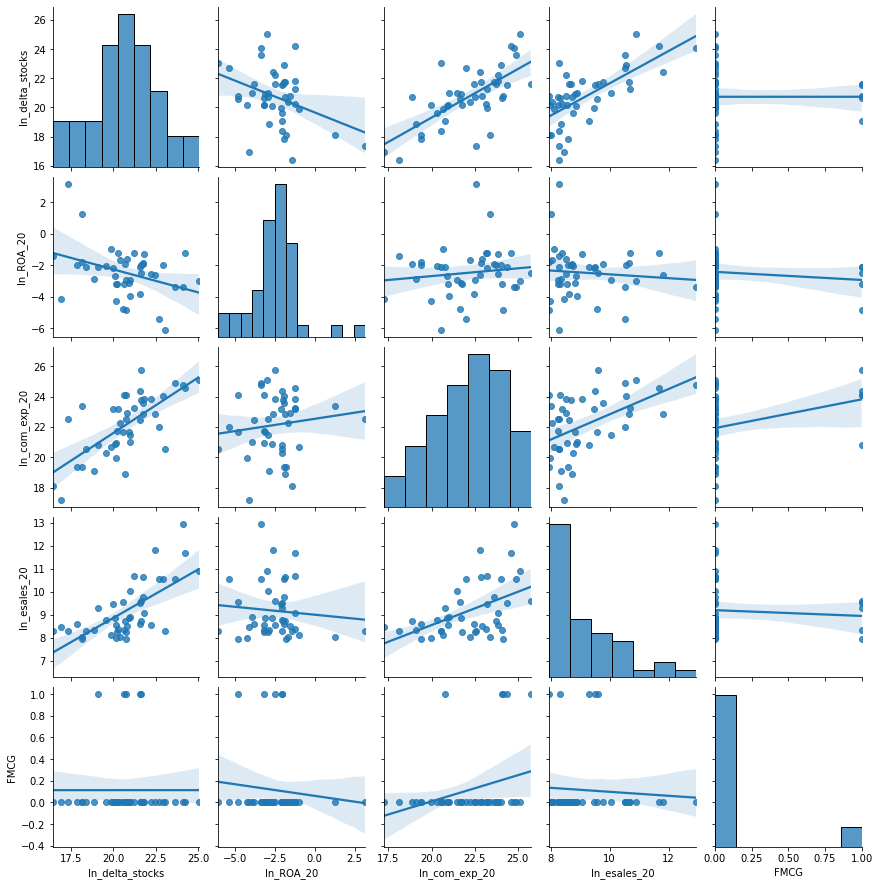

In [49]:
sns.pairplot(df[['ln_delta_stocks','ln_ROA_20','ln_com_exp_20','ln_esales_20','FMCG']][(df['Stocks_20']!=0)&(df['Stocks_18']!=0)&(df['com_exp_20']!=0)&(df['EBT_20']!=0)&(df['Assets_20']!=0)].dropna(),kind='reg')
#plt.savefig('pairplot_1')

In [24]:
df[['ln_delta_stocks','ln_ROA_20','ln_com_exp_20','ln_esales_20','FMCG']][(df['Stocks_20']!=0)&(df['Stocks_18']!=0)&(df['com_exp_20']!=0)&(df['EBT_20']!=0)&(df['Assets_20']!=0)].dropna().describe()

,ln_delta_stocks,ln_ROA_20,ln_com_exp_20,ln_esales_20,FMCG
count,44.000000,44.000000,44.000000,44.000000,44.000000
mean,20.733322,-2.471993,22.142579,9.169002,0.113636
std,1.918270,1.571745,2.009592,1.184000,0.321038
min,16.428737,-6.070818,17.226889,7.955074,0.000000
25%,19.957682,-3.181895,20.769535,8.289028,0.000000
50%,20.753829,-2.318161,22.486285,8.714370,0.000000
75%,21.745499,-1.837376,23.775057,9.654699,0.000000
max,25.058528,3.145413,25.729748,12.931687,1.000000


In [30]:
df['ln_ABS_LIQ'] = np.log(df['Cur_assets_20'] / df['short_debt_20'])
df['ln_LR_COV'] = np.log((df['Capital_20'] + df['long_debt_20']) / df['Assets_20'])


C:\Users\demen\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [31]:
df['ABS_LIQ'] = (df['Cur_assets_20'] / df['short_debt_20'])
df['LR_COV'] = ((df['Capital_20'] + df['long_debt_20']) / df['Assets_20'])

In [33]:
df[(df['Stocks_20']!=0)&(df['Stocks_18']!=0)&(df['com_exp_20']!=0)&(df['EBT_20']!=0)&(df['Assets_20']!=0)&(df['Capital_20']!=0)&(df['long_debt_20']!=0)][['ln_delta_stocks','ln_ABS_LIQ','ln_LR_COV','ln_ROA_20','ln_com_exp_20','ln_esales_20']].dropna()

,ln_delta_stocks,ln_ABS_LIQ,ln_LR_COV,ln_ROA_20,ln_com_exp_20,ln_esales_20
INN,,,,,,
2540167061,24.222229,1.054774,-0.406362,-1.233297,24.595194,11.667876
7707548740,25.058528,-0.133096,-1.463672,-3.018274,25.107193,10.892285
7722753969,21.739841,0.408081,-0.895728,-1.853365,22.833078,10.657730
7729355029,22.906595,0.138619,-1.297950,-1.958956,24.018047,10.563595
5029069967,23.625295,-0.630878,-1.119528,-3.362527,24.874095,10.539535
7721793895,21.762475,0.496906,-0.905185,-1.939506,23.602959,9.773379
7728029110,21.616737,0.076625,-0.497920,-2.485850,25.729748,9.615139
3666113066,20.933011,0.247571,-1.386413,-3.113336,21.698977,8.839277
6670381056,21.592694,-0.096759,-1.655399,-3.823584,22.455798,8.610684


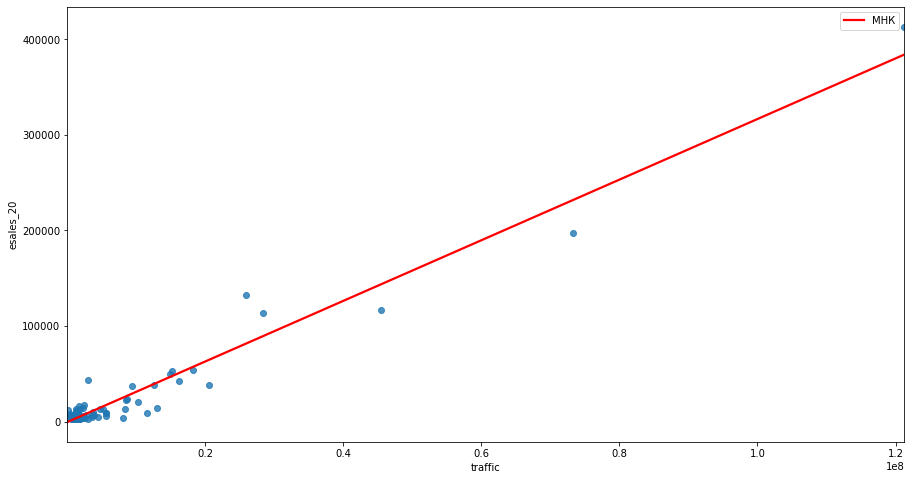

In [40]:
f, ax = plt.subplots(figsize=(15,8))
sns.regplot(x='traffic',y='esales_20',data=df[['esales_20','traffic']].dropna(),fit_reg=True,ci=0,line_kws={'color':'red'})

plt.legend(['МНК'])
plt.savefig('traffic_sales')

In [ ]:
f, ax = plt.subplots(figsize=(15,8))
sns.regplot(x='traffic',y='esales_20',data=df[['esales_20','traffic']].dropna(),fit_reg=True,ci=0,line_kws={'color':'red'})

plt.legend(['МНК'])
plt.savefig('traffic_sales')

In [7]:
df.columns.values


array(['FMCG', 'is_auto', 'is_house', 'is_health', 'is_books',
       'is_beauty', 'is_cloth', 'is_office', 'is_gifts', 'is_sport',
       'is_child', 'is_uni', 'is_tech', 'esales_20', 'delta_esales_20',
       'orders', 'delta_orders', 'av_price', 'delta_av_price', 'traffic',
       'INT_18', 'INT_19', 'INT_20', 'INT_21', 'FA_18', 'FA_19', 'FA_20',
       'FA_21', 'Stocks_18', 'Stocks_19', 'Stocks_20', 'Stocks_21',
       'NA_18', 'NA_19', 'NA_20', 'NA_21', 'Assets_18', 'Assets_19',
       'Assets_20', 'Assets_21', 'AdCap_18', 'AdCap_19', 'AdCap_20',
       'AdCap_21', 'Rev_18', 'Rev_19', 'Rev_20', 'Rev_21', 'CoS_18',
       'CoS_19', 'CoS_20', 'CoS_21', 'Gross_18', 'Gross_19', 'Gross_20',
       'Gross_21', 'ComExp_18', 'ComExp_19', 'ComExp_20', 'ComExp_21',
       'Turn_18', 'Turn_19', 'Turn_20', 'Turn_21', 'Cur_assets_18',
       'Cur_assets_19', 'Cur_assets_20', 'Cur_assets_21', 'Capital_18',
       'Capital_19', 'Capital_20', 'Capital_21', 'long_debt_18',
       'long_debt_19', '

In [28]:
X = df[['l_traffic', 'Turn_20','Turn_18','delta_stocks','delta_com_exp','ROE_20','ROA_20','LR_COV_20','LR_cov_18','abs_liq_20','abs_liq_18','ROA_18','ROE_18']].dropna()[(df['Stocks_20']!=0)&(df['Stocks_18']!=0)&(df['com_exp_18']!=0)&(df['EBT_20']!=0)&(df['Assets_20']!=0)]
X.describe()

<ipython-input-28-bc79d1798b6e>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X = df[['l_traffic', 'Turn_20','Turn_18','delta_stocks','delta_com_exp','ROE_20','ROA_20','LR_COV_20','LR_cov_18','abs_liq_20','abs_liq_18','ROA_18','ROE_18']].dropna()[(df['Stocks_20']!=0)&(df['Stocks_18']!=0)&(df['com_exp_18']!=0)&(df['EBT_20']!=0)&(df['Assets_20']!=0)]


,l_traffic,Turn_20,Turn_18,delta_stocks,delta_com_exp,ROE_20,ROA_20,LR_COV_20,LR_cov_18,abs_liq_20,abs_liq_18,ROA_18,ROE_18
count,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000
mean,14.963239,9.573437,9.493750,1.619184,1.425422,4.306892,0.458794,1.101392,0.716858,1.497381,1.587866,0.245315,0.236700
std,1.285648,8.679244,11.989491,1.864977,0.687925,33.864000,2.929943,5.191741,2.807071,1.641622,2.715410,1.250897,1.268009
min,11.417698,0.500000,0.000000,0.002719,0.155877,-9.284378,-0.812007,-1.090570,-0.785955,0.319943,0.355679,-0.773295,-4.848371
25%,14.155318,4.150000,3.575000,0.950318,0.965603,0.091800,0.008210,0.108717,0.083710,0.970791,0.946749,0.010583,0.089934
50%,14.687436,7.200000,6.150000,1.269754,1.203018,0.270322,0.051151,0.236432,0.204463,1.152432,1.071549,0.036231,0.286326
75%,15.922060,10.725000,10.750000,1.648552,1.691547,0.486745,0.141249,0.425369,0.369551,1.457359,1.358429,0.103321,0.579686
max,18.613492,50.100000,77.300000,15.169364,3.230848,270.727969,23.229278,38.673456,18.288990,13.183123,22.201859,7.778591,5.580335


<AxesSubplot:>

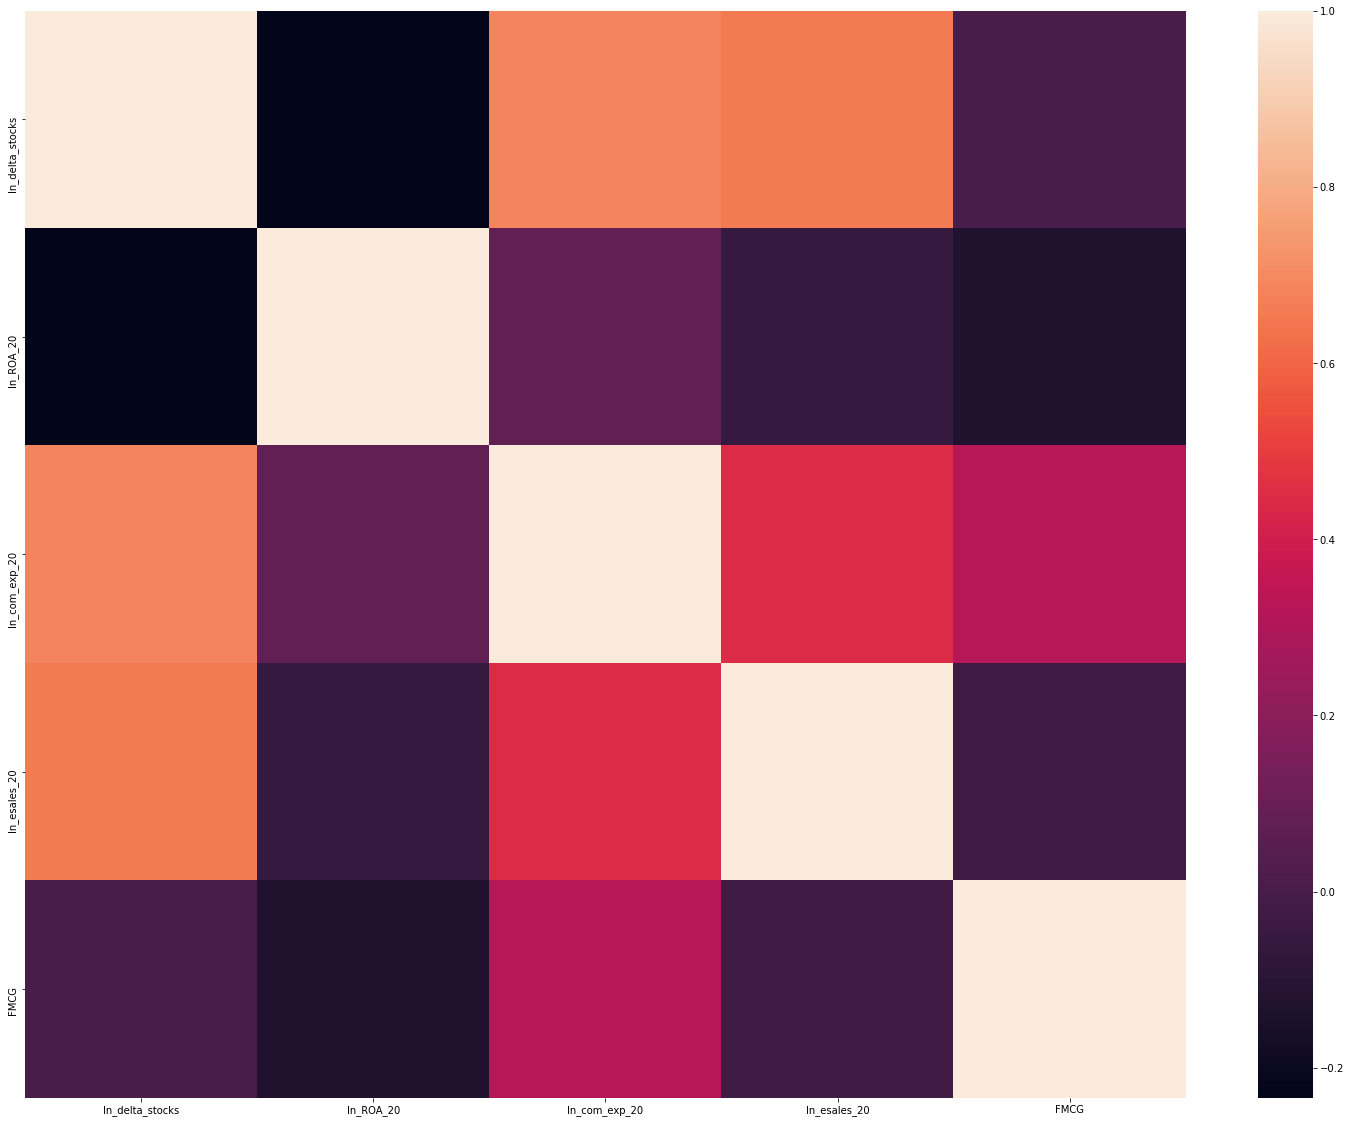

In [56]:
rho, pval = stats.spearmanr(X)
ax, f = plt.subplots(figsize=(26,20))
sns.heatmap(X.corr(method='spearman'),xticklabels=X.columns, yticklabels=X.columns)

In [36]:
rho, pval = stats.spearmanr(X)
pd.DataFrame(rho, columns=X.columns,index=X.columns)

,l_traffic,Turn_20,Turn_18,delta_stocks,delta_com_exp,ROE_20,ROA_20,LR_COV_20,LR_cov_18,abs_liq_20,abs_liq_18,ROA_18,ROE_18
l_traffic,1.000000,-0.428557,-0.289043,0.129945,0.112866,-0.080815,-0.171795,-0.139057,0.059295,-0.175183,-0.101648,-0.049222,-0.184753
Turn_20,-0.428557,1.000000,0.720293,0.109309,0.285796,0.159475,0.335253,0.255733,0.151805,0.258435,0.128977,0.203712,0.127878
Turn_18,-0.289043,0.720293,1.000000,0.188396,0.182164,0.082181,0.293648,0.271287,0.105321,0.228650,0.016290,0.118770,0.072169
delta_stocks,0.129945,0.109309,0.188396,1.000000,0.785852,0.061584,0.030311,-0.063965,-0.122527,0.015614,-0.116896,0.099771,0.175504
delta_com_exp,0.112866,0.285796,0.182164,0.785852,1.000000,0.161630,0.151923,-0.048123,-0.136035,-0.002015,-0.168773,0.187546,0.230495
ROE_20,-0.080815,0.159475,0.082181,0.061584,0.161630,1.000000,0.438965,-0.044368,-0.089927,0.078388,0.129304,0.308654,0.404991
ROA_20,-0.171795,0.335253,0.293648,0.030311,0.151923,0.438965,1.000000,0.522390,0.415659,0.570421,0.549405,0.798168,0.462866
LR_COV_20,-0.139057,0.255733,0.271287,-0.063965,-0.048123,-0.044368,0.522390,1.000000,0.829167,0.815293,0.658471,0.593315,-0.009982
LR_cov_18,0.059295,0.151805,0.105321,-0.122527,-0.136035,-0.089927,0.415659,0.829167,1.000000,0.579579,0.688507,0.552106,-0.163690
abs_liq_20,-0.175183,0.258435,0.228650,0.015614,-0.002015,0.078388,0.570421,0.815293,0.579579,1.000000,0.813416,0.613141,0.137088


In [18]:
pd.DataFrame(rho, columns=X.columns,index=X.columns)

,delta_stocks,delta_com_exp,ROE_20,ROA_20,LR_COV_20,LR_cov_18,abs_liq_20,abs_liq_18,ROA_18,ROE_18
delta_stocks,1.000000,0.645824,0.124812,-0.003035,-0.095967,-0.149556,0.031743,-0.092303,0.072044,0.226439
delta_com_exp,0.645824,1.000000,0.164785,0.132495,-0.007054,-0.060861,-0.001914,-0.102256,0.177334,0.171183
ROE_20,0.124812,0.164785,1.000000,0.401422,-0.016705,-0.043964,0.125140,0.141490,0.283117,0.394614
ROA_20,-0.003035,0.132495,0.401422,1.000000,0.556692,0.487273,0.572714,0.549282,0.816951,0.441914
LR_COV_20,-0.095967,-0.007054,-0.016705,0.556692,1.000000,0.868380,0.810390,0.679016,0.590513,-0.035735
LR_cov_18,-0.149556,-0.060861,-0.043964,0.487273,0.868380,1.000000,0.632235,0.716801,0.574463,-0.144662
abs_liq_20,0.031743,-0.001914,0.125140,0.572714,0.810390,0.632235,1.000000,0.833301,0.610171,0.154094
abs_liq_18,-0.092303,-0.102256,0.141490,0.549282,0.679016,0.716801,0.833301,1.000000,0.645824,0.110212
ROA_18,0.072044,0.177334,0.283117,0.816951,0.590513,0.574463,0.610171,0.645824,1.000000,0.449979
ROE_18,0.226439,0.171183,0.394614,0.441914,-0.035735,-0.144662,0.154094,0.110212,0.449979,1.000000


<AxesSubplot:>

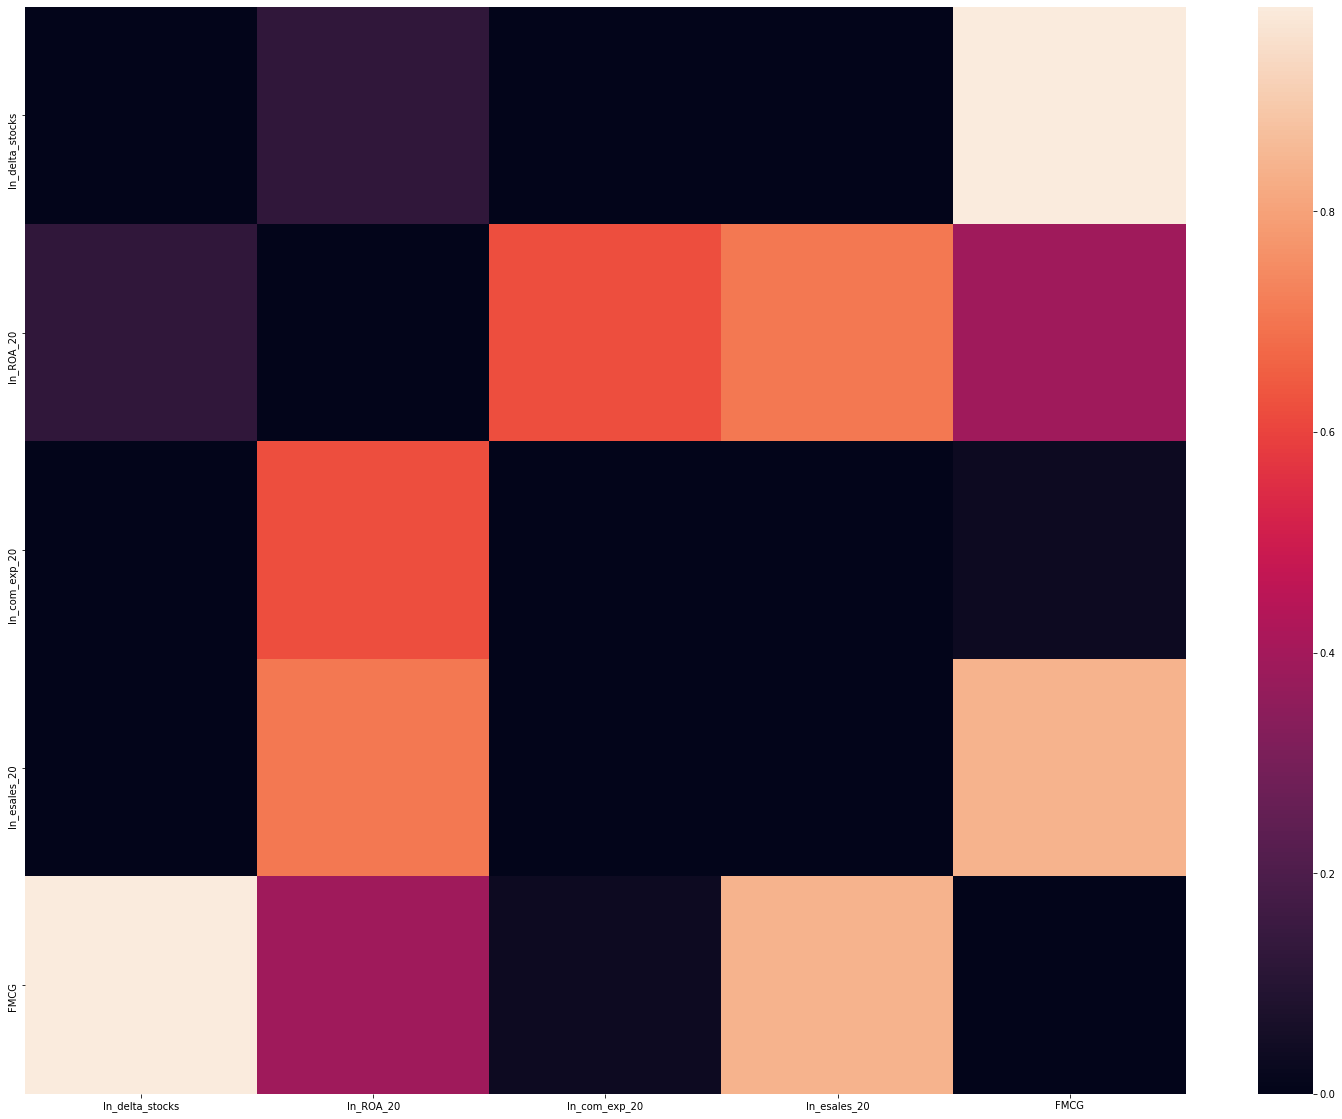

In [53]:
ax, f = plt.subplots(figsize=(26,20))
sns.heatmap(pval, xticklabels=X.columns, yticklabels=X.columns)

In [23]:
X.corr(method='spearman').to_excel('corr_P.xlsx')

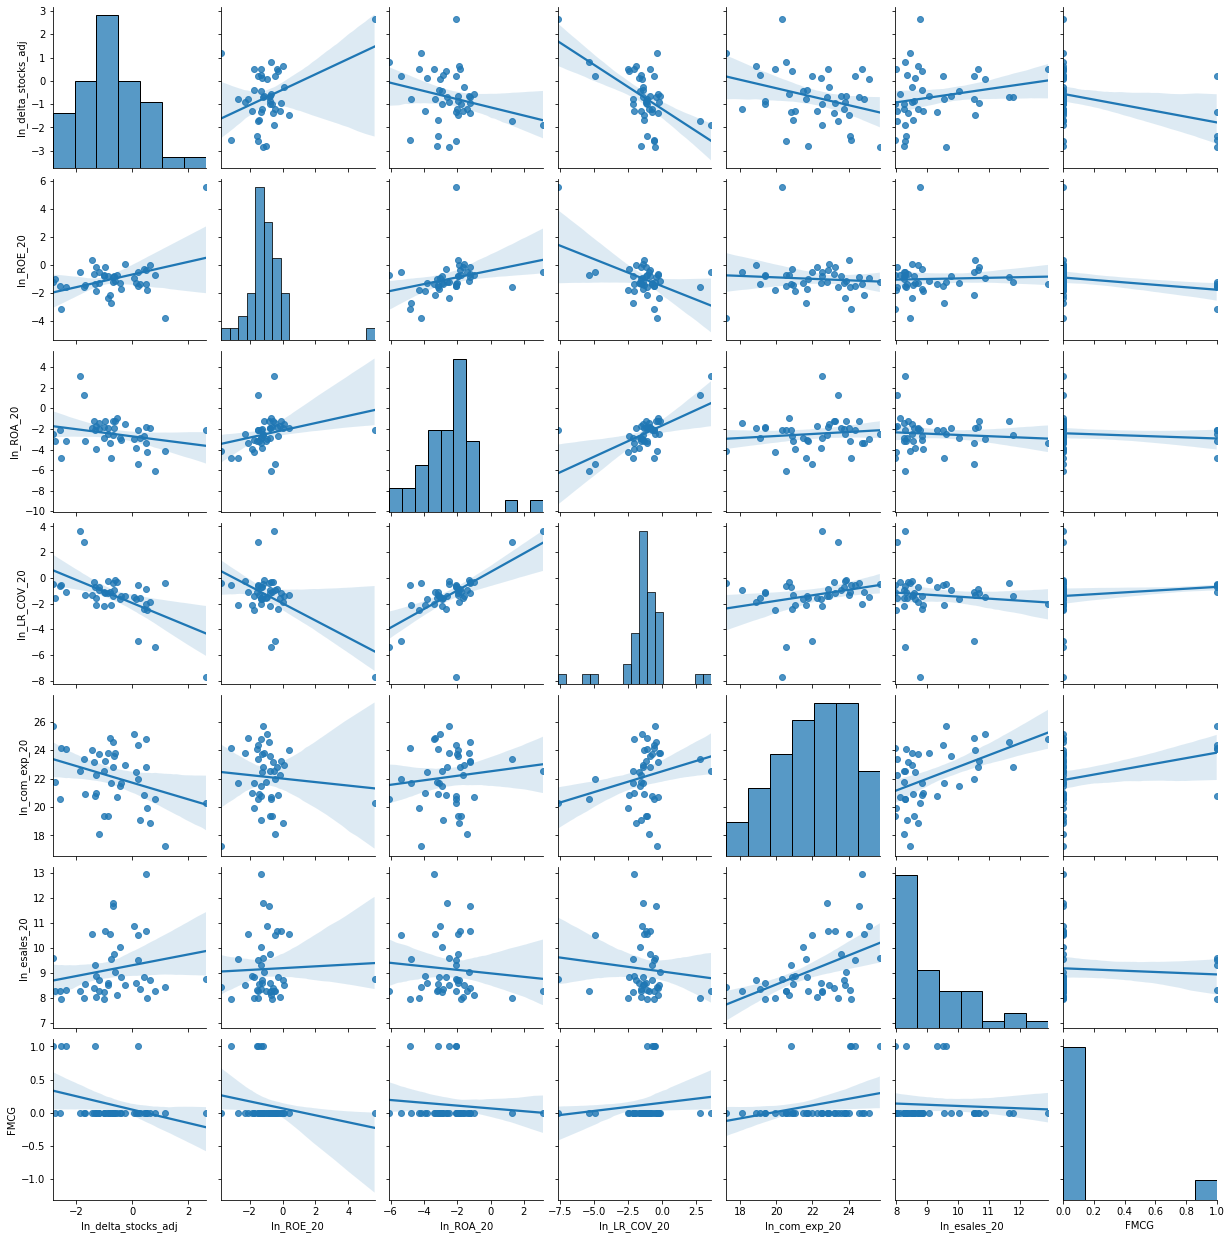

In [12]:
sns.pairplot(df[['ln_delta_stocks_adj','ln_ROE_20','ln_ROA_20','ln_LR_COV_20','ln_com_exp_20','ln_esales_20','FMCG']]
             [(df['Stocks_20']!=0)&(df['Stocks_18']!=0)&(df['com_exp_20']!=0)&(df['EBT_20']!=0)&(df['Assets_20']!=0)].dropna(),kind='reg')
#plt.savefig('pairplot_1')

In [16]:
df[['ln_delta_stocks_adj','ln_ROE_20','ln_ROA_20','ln_LR_COV_20','ln_com_exp_20','ln_esales_20','FMCG']][(df['Stocks_20']!=0)&(df['Stocks_18']!=0)&(df['com_exp_20']!=0)&(df['EBT_20']!=0)&(df['Assets_20']!=0)].dropna().describe()

,ln_delta_stocks_adj,ln_ROE_20,ln_ROA_20,ln_LR_COV_20,ln_com_exp_20,ln_esales_20,FMCG
count,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000
mean,-0.701061,-0.978998,-2.479470,-1.323507,22.118202,9.161921,0.116279
std,1.131820,1.318847,1.589554,1.740059,2.026782,1.197069,0.324353
min,-2.858022,-3.750938,-6.070818,-7.675203,17.226889,7.955074,0.000000
25%,-1.327509,-1.490705,-3.189948,-1.641483,20.741885,8.286509,0.000000
50%,-0.762233,-1.104203,-2.485850,-1.204409,22.455798,8.706159,0.000000
75%,0.156776,-0.561314,-1.821387,-0.593345,23.792385,9.694259,0.000000
max,2.651082,5.601115,3.145413,3.655153,25.729748,12.931687,1.000000


In [58]:
df[df['ln_delta_stocks_adj'] == df['ln_delta_stocks_adj'][df['ln_delta_stocks_adj']<10000000000].dropna().max()]

,FMCG,is_auto,is_house,is_health,is_books,is_beauty,is_cloth,is_office,is_gifts,is_sport,...,ln_ROA_20,ln_com_exp_20,ln_esales_20,ln_ROE_20,delta_stocks,ROE_20,ln_LR_COV_20,LR_COV_20,ln_delta_stocks_adj,delta_stocks_adj
INN,,,,,,,,,,,,,,,,,,,,,
7811657720,1,0,0,0,0,0,0,0,0,0,...,NaN,22.613651,9.15377,NaN,65.683491,-2.33633,-0.579128,0.560387,4.169506,64.683491


In [24]:
df['aut'] = (df['short_debt_20'] + df['long_debt_20']) / df['Assets_20']

In [26]:
df[df['aut'] > 1][['Assets_20','short_debt_20','long_debt_20']]

,Assets_20,short_debt_20,long_debt_20
INN,,,
7709770002,11658929000,11757488000,0
9718101499,2635694000,2704182000,0
7728644571,2508087000,2555010000,0
7706692532,536722000,726957000,0
5027213485,632521000,39560432000,0
7716761626,285639000,554723000,0
7718280244,576231000,1200356000,124650000
7731380953,268888000,154646000,200402000
7707061530,9118522000,9932591000,0


In [39]:
df[['Assets_20','l_traffic']].corr()

,Assets_20,l_traffic
Assets_20,1.000000,0.438474
l_traffic,0.438474,1.000000
